In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [2]:
df = pd.read_csv('../validation/aggregate_results/aggregate_validation_results.csv')
df.dropna(inplace=True)
for c in df.columns:
    if 'Unnamed' in c:
        del df[c]
df.head()

,UTM_E,UTM_N,MagnaProbe Depth [m],geometry,Raster Value [m],Probe-Raster Delta [m],Raster Value Corrected [m],Year,Study Area
0,422637.925658,7.674614e+06,0.3410,POINT (422637.92565783 7674614.289540267),0.436340,-0.095340,0.356340,2018,Happy Valley
1,422636.925775,7.674616e+06,0.3232,POINT (422636.9257748795 7674616.18459558),0.520660,-0.197460,0.440660,2018,Happy Valley
2,422636.600034,7.674618e+06,0.4831,POINT (422636.6000335729 7674618.426386847),0.569305,-0.086205,0.489305,2018,Happy Valley
3,422636.272506,7.674619e+06,0.4926,POINT (422636.2725060719 7674618.615322301),0.569305,-0.076705,0.489305,2018,Happy Valley
4,422636.982464,7.674620e+06,0.6242,POINT (422636.9824642739 7674620.087788817),0.609161,0.015039,0.529161,2018,Happy Valley


In [3]:
df['Error [m]'] = df['Probe-Raster Delta [m]'].astype('float32')
clpx = df[df['Study Area'] == 'CLPX']
hv = df[df['Study Area'] == 'Happy Valley']

In [4]:
sns.set_style('white')
sns.set_context('paper')

/home/cparr/miniconda3/envs/masters/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


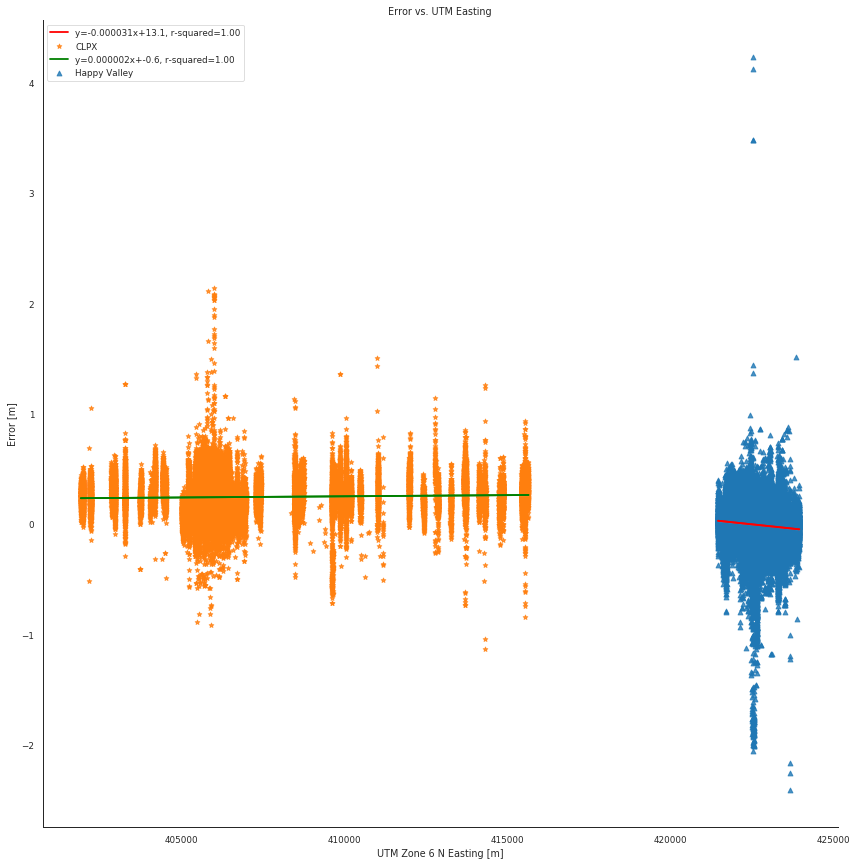

In [14]:
p = sns.lmplot(data=df, x="UTM_E", y="Error [m]", hue='Study Area', markers=['^','*'],
               height=12, truncate=True, legend=False)

reg1, reg2 = p.ax.get_lines()

reg1_slope, reg1_y_int, reg1_r_value, reg1_p_value, reg1_std_err = scipy.stats.linregress(x=reg1.get_xdata(),
                                                                           y=reg1.get_ydata())
reg1_rsquare = reg1_r_value ** 2

reg2_slope, reg2_y_int, reg2_r_value, reg2_p_value, reg2_std_err = scipy.stats.linregress(x=reg2.get_xdata(),
                                                                           y=reg2.get_ydata())
reg2_rsquare = reg2_r_value ** 2

reg1_label = "y={0:.6f}x+{1:.1f}, r-squared={2:.2f}".format(reg1_slope, reg1_y_int, reg1_rsquare)
reg2_label = "y={0:.6f}x+{1:.1f}, r-squared={2:.2f}".format(reg2_slope, reg2_y_int, reg2_rsquare)

reg1.set_label(reg1_label)
reg2.set_label(reg2_label)
reg1.set_color('red')
reg2.set_color('green')

p.ax.add_line(reg1)
p.ax.add_line(reg2)
p.ax.legend()

handles,labels = p.ax.get_legend_handles_labels() #get existing legend item handles and labels
i = np.arange(len(labels)) #make an index for later
leg_filter = np.array([]) #set up a filter (empty for now)
unique_labels = list(set(labels)) #find unique labels

for ul in unique_labels: #loop through unique labels
    leg_filter = np.append(leg_filter,[i[np.array(labels) == ul][0]])
    #find the first instance of this label and add its index to the filter

handles = [handles[int(f)] for f in leg_filter] #filter out legend items to keep only the first instance of each repeated label
labels = [labels[int(f)] for f in leg_filter]
p.ax.legend(handles, labels) #draw the legend with the filtered handles and labels lists
p.set_xlabels('UTM Zone 6 N Easting [m]')
p.ax.set_title('Error vs. UTM Easting')
p.savefig('/home/cparr/scratch/reg.png',dpi=300, bbox_inches='tight')


In [ ]:
p = sns.lmplot(data=df, x="UTM_N", y="Error [m]", hue='Study Area', markers=['x','o'],
               height=12, truncate=True, legend=False)

reg1, reg2 = p.ax.get_lines()

reg1_slope, reg1_y_int, reg1_r_value, reg1_p_value, reg1_std_err = scipy.stats.linregress(x=reg1.get_xdata(),
                                                                           y=reg1.get_ydata())
reg1_rsquare = reg1_r_value ** 2

reg2_slope, reg2_y_int, reg2_r_value, reg2_p_value, reg2_std_err = scipy.stats.linregress(x=reg2.get_xdata(),
                                                                           y=reg2.get_ydata())
reg2_rsquare = reg2_r_value ** 2

reg1_label = "y={0:.6f}x+{1:.1f}, r-squared={2:.2f}".format(reg1_slope, reg1_y_int, reg1_rsquare)
reg2_label = "y={0:.6f}x+{1:.1f}, r-squared={2:.2f}".format(reg2_slope, reg2_y_int, reg2_rsquare)

reg1.set_label(reg1_label)
reg2.set_label(reg2_label)
reg1.set_color('red')
reg2.set_color('green')

p.ax.add_line(reg1)
p.ax.add_line(reg2)
p.ax.legend()

handles,labels = p.ax.get_legend_handles_labels() #get existing legend item handles and labels
i = np.arange(len(labels)) #make an index for later
leg_filter = np.array([]) #set up a filter (empty for now)
unique_labels = list(set(labels)) #find unique labels

for ul in unique_labels: #loop through unique labels
    leg_filter = np.append(leg_filter,[i[np.array(labels) == ul][0]])
    #find the first instance of this label and add its index to the filter

handles = [handles[int(f)] for f in leg_filter] #filter out legend items to keep only the first instance of each repeated label
labels = [labels[int(f)] for f in leg_filter]
p.ax.legend(handles, labels) #draw the legend with the filtered handles and labels lists

p.set_xlabels('UTM Zone 6 N Northing [m]')
p.ax.title('Error vs. UTM Northing')
p.savefig('/home/cparr/scratch/reg2.png',dpi=300, bbox_inches='tight')


In [ ]:
sns.jointplot(data=clpx, x="UTM_E", y="Error [m]", kind="reg", height=12, truncate=True)

In [ ]:
sns.jointplot(data=clpx, x="UTM_N", y="Error [m]", kind="reg", marker='x', height=12, truncate=True)

In [ ]:
sns.jointplot("UTM_E", "Error [m]", data=hv, kind="reg", color='g', height=12, truncate=True)

In [ ]:
sns.jointplot("UTM_N", "Error [m]", data=hv, kind="reg", color='g', marker='x', height=12,truncate=True)